In [7]:
import pandas as pd

# Path to your downloaded dataset file
file_path = r"C:\Users\gurus\Downloads\taxi_fare.csv"  # ← added r to make it a raw string

# Load the dataset
df = pd.read_csv(file_path)  # ← use the variable, not the path again

# Display first few rows to check
print(df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   pickup_longitude  pickup_latitude  RatecodeID store_and_fwd_flag  \
0        -73.976746        40.765152           1                  N   
1        -73.983482        40.767925           1                  N   
2        -73.782021        40.644810           1                  N   
3        -73.863419        40.769814           1                  N   
4        -73.971741        40.792183           3                  N   

   dropoff_longitude  dropoff_latitude  payment_type  fare_amount  extra  \
0         -74.004265         40.746128        

In [9]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [11]:
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0


In [13]:
print("\nData types:\n", df.dtypes)



Data types:
 VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


In [15]:
print("Shape of dataset:", df.shape)


Shape of dataset: (212345, 18)


In [17]:
import pandas as pd
import numpy as np

# Load dataset
file_path = r"C:\Users\gurus\Downloads\taxi_fare.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names (good practice)
df.columns = df.columns.str.strip()

# Convert tpep_pickup_datetime to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# --- Trip distance using Haversine formula ---
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    """
    R = 6371  # Earth radius in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['trip_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                                df['dropoff_longitude'], df['dropoff_latitude'])

# --- Pickup day: weekday or weekend ---
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# --- AM or PM ---
df['am_pm'] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 'AM' if x < 12 else 'PM')

# --- Is night (1 if 8 PM to 5 AM) ---
df['is_night'] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if (x >= 20 or x <= 5) else 0)

# --- Convert UTC to EDT (UTC-4) ---
df['pickup_datetime_edt'] = df['tpep_pickup_datetime'] - pd.Timedelta(hours=4)

# --- Check new columns ---
print(df[['trip_distance', 'pickup_day', 'am_pm', 'is_night', 'tpep_pickup_datetime', 'pickup_datetime_edt']].head())


   trip_distance pickup_day am_pm  is_night tpep_pickup_datetime  \
0       3.138096    Weekday    AM         1           2016-03-01   
1       4.303331    Weekday    AM         1           2016-03-01   
2      16.600142    Weekday    AM         1           2016-03-01   
3       9.046547    Weekday    AM         1           2016-03-01   
4      20.400022    Weekday    AM         1           2016-03-01   

  pickup_datetime_edt  
0 2016-02-29 20:00:00  
1 2016-02-29 20:00:00  
2 2016-02-29 20:00:00  
3 2016-02-29 20:00:00  
4 2016-02-29 20:00:00  


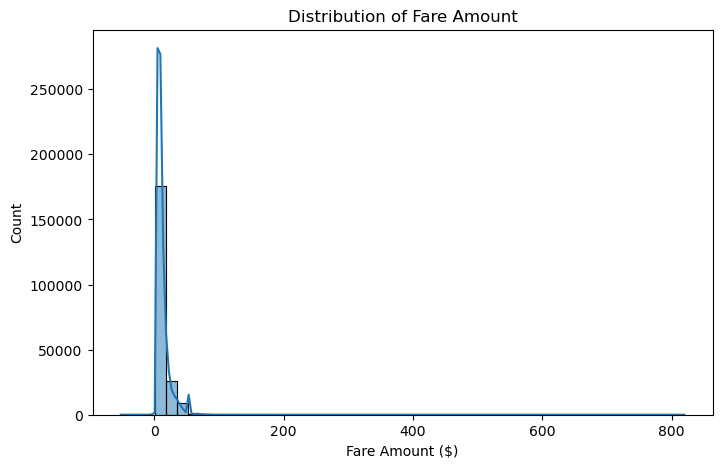

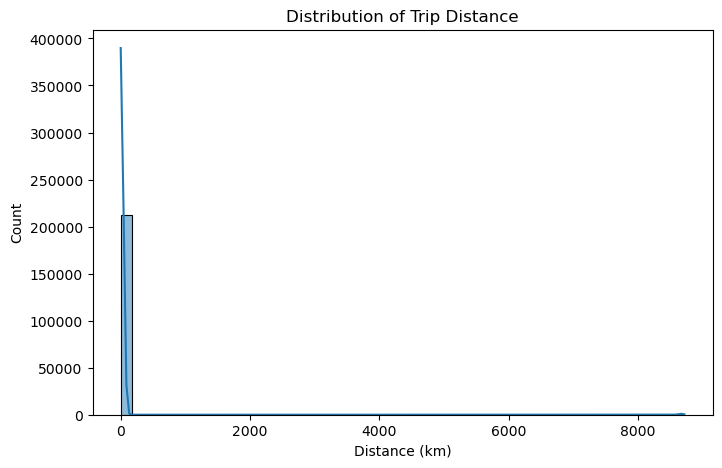

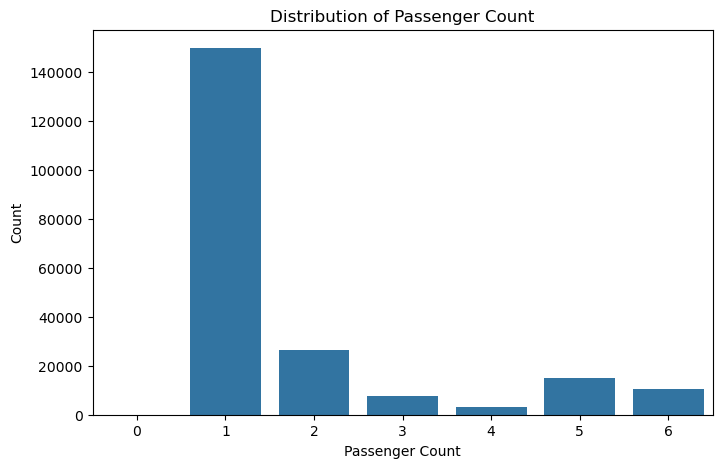

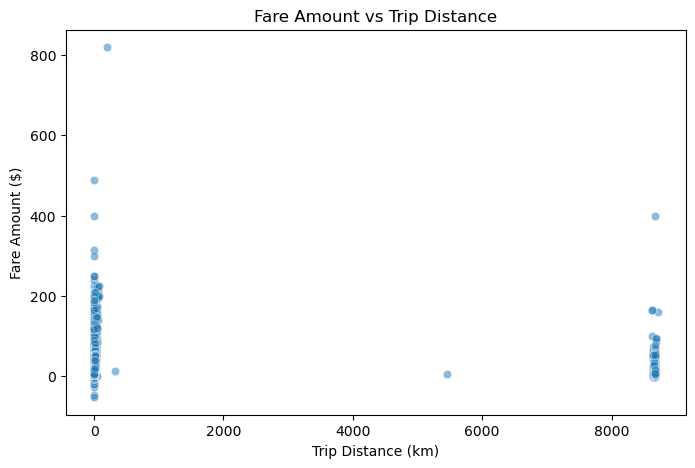

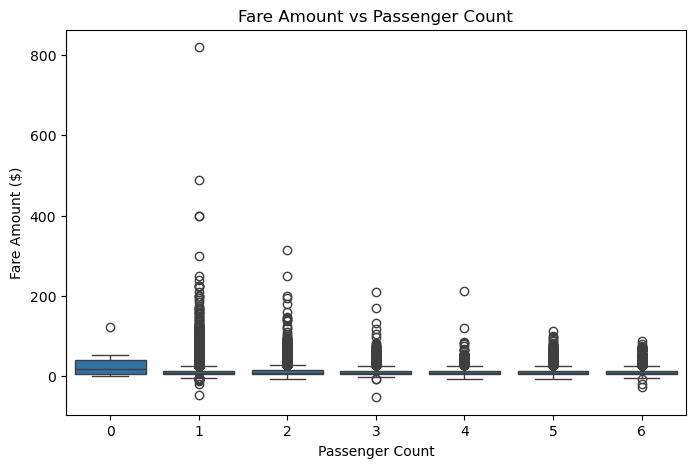


Fare Amount:  count    212345.000000
mean         12.665588
std          10.875584
min         -52.000000
25%           6.500000
50%           9.500000
75%          14.500000
max         819.500000
Name: fare_amount, dtype: float64

Trip Distance:  count    212345.000000
mean         25.156607
std         435.567787
min           0.000000
25%           1.155181
50%           1.937586
75%           3.565562
max        8713.463111
Name: trip_distance, dtype: float64


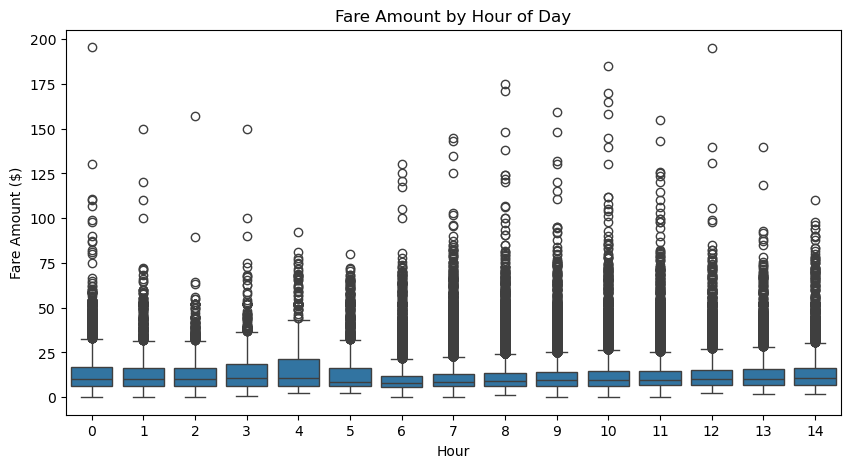

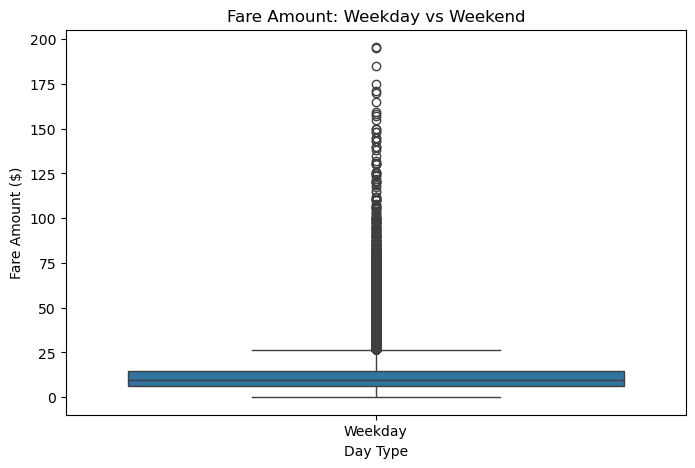

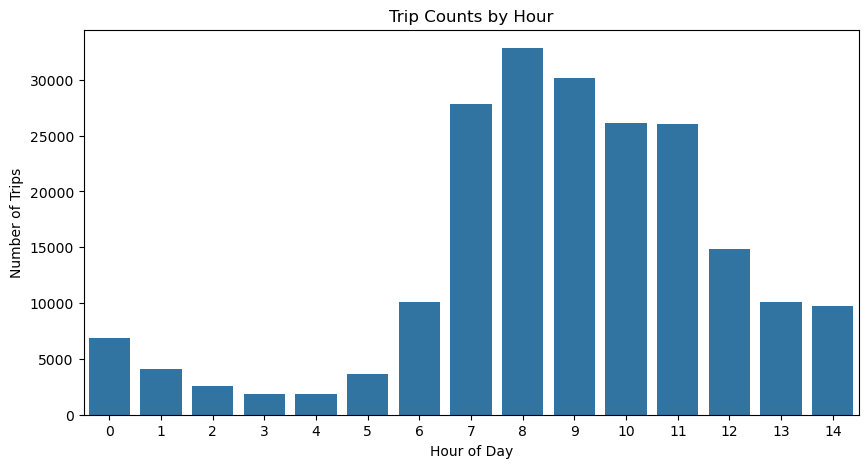

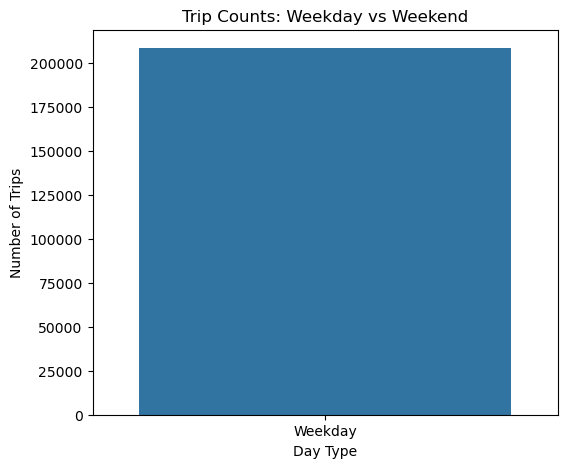

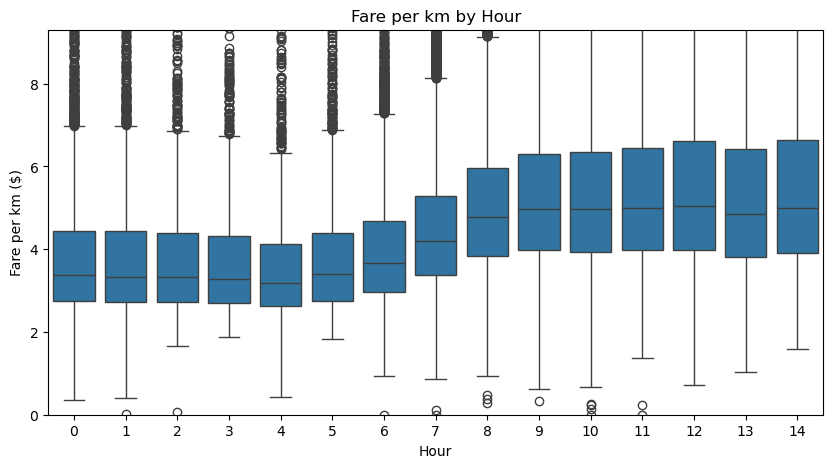

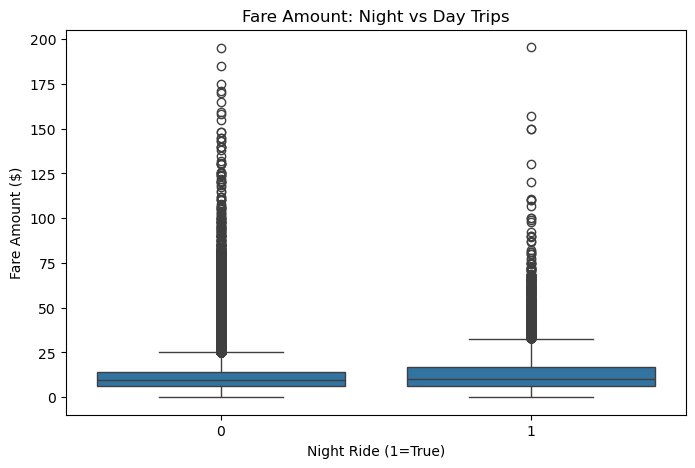

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset again if needed
file_path = r"C:\Users\gurus\Downloads\taxi_fare.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Add derived columns (from before)
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['trip_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                                df['dropoff_longitude'], df['dropoff_latitude'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['month'] = df['tpep_pickup_datetime'].dt.month

# ================================
# Univariate Analysis
# ================================

plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

# ================================
# Bivariate Analysis
# ================================

# Fare vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Fare vs Passenger Count
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

# ================================
# Outlier Detection
# ================================

# Print thresholds for fare and distance
print("\nFare Amount: ", df['fare_amount'].describe())
print("\nTrip Distance: ", df['trip_distance'].describe())

# Filter obvious outliers
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 200)]
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

# ================================
# Time-based Analyses
# ================================

# Fare by Hour
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fare Amount ($)')
plt.show()

# Fare by Day Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='pickup_day', y='fare_amount', data=df)
plt.title('Fare Amount: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Fare Amount ($)')
plt.show()

# Trip Counts by Hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title('Trip Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Trip Counts by Day Type
plt.figure(figsize=(6, 5))
sns.countplot(x='pickup_day', data=df)
plt.title('Trip Counts: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.show()

# ================================
# Additional Features
# ================================

# Fare per km
df['fare_per_km'] = df['fare_amount'] / df['trip_distance']

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='fare_per_km', data=df)
plt.title('Fare per km by Hour')
plt.xlabel('Hour')
plt.ylabel('Fare per km ($)')
plt.ylim(0, df['fare_per_km'].quantile(0.95))  # Limit to 95th percentile to avoid extreme values
plt.show()

# Night rides analysis
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 20 or x <= 5) else 0)

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_night', y='fare_amount', data=df)
plt.title('Fare Amount: Night vs Day Trips')
plt.xlabel('Night Ride (1=True)')
plt.ylabel('Fare Amount ($)')
plt.show()


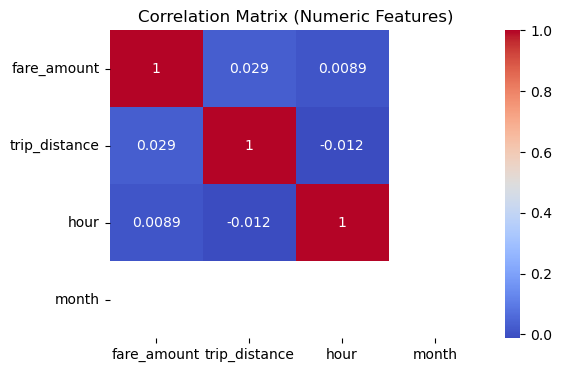


Chi-Square Scores for Categorical Variables (using binned fares):
                      Feature   Chi2 Score
2                       pay_2  1280.595840
3                       pay_3   103.615940
4                       pay_4    50.467627
1  store_and_fwd_flag_encoded    24.631951
0          pickup_day_encoded          NaN

Random Forest Feature Importances:
                      Feature  Importance
0               trip_distance    0.951219
1                        hour    0.038112
5                       pay_2    0.006354
6                       pay_3    0.001959
4  store_and_fwd_flag_encoded    0.001363
7                       pay_4    0.000994
2                       month    0.000000
3          pickup_day_encoded    0.000000


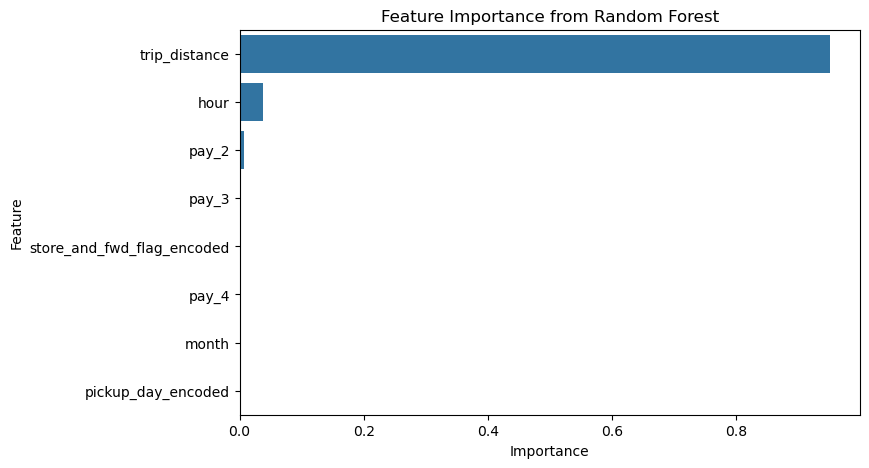

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = r"C:\Users\gurus\Downloads\taxi_fare.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Derived columns
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['trip_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                                df['dropoff_longitude'], df['dropoff_latitude'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['month'] = df['tpep_pickup_datetime'].dt.month

# Encode categoricals
df['pickup_day_encoded'] = df['pickup_day'].map({'Weekday': 0, 'Weekend': 1})
if 'store_and_fwd_flag' in df.columns:
    df['store_and_fwd_flag_encoded'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
if 'payment_type' in df.columns:
    df = pd.get_dummies(df, columns=['payment_type'], prefix='pay', drop_first=True)

# ===============================
# Correlation Analysis
# ===============================
corr_matrix = df[['fare_amount', 'trip_distance', 'hour', 'month']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# ===============================
# Chi-Square Test (Binned target)
# ===============================
cat_features = ['pickup_day_encoded']
if 'store_and_fwd_flag_encoded' in df.columns:
    cat_features.append('store_and_fwd_flag_encoded')
if any(col.startswith('pay_') for col in df.columns):
    cat_features.extend([col for col in df.columns if col.startswith('pay_')])

# Bin fare_amount into 3 categories
df['fare_bin'] = pd.qcut(df['fare_amount'], q=3, labels=[0, 1, 2])

# Prepare X and y for chi2
X_cat = df[cat_features].fillna(0).astype(int)
y_cat = df['fare_bin'].astype(int)

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y_cat)
chi2_scores = chi2_selector.scores_

chi2_results = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi2_scores})
print("\nChi-Square Scores for Categorical Variables (using binned fares):")
print(chi2_results.sort_values(by='Chi2 Score', ascending=False))

# ===============================
# Feature Importance (Random Forest)
# ===============================
feature_cols = ['trip_distance', 'hour', 'month', 'pickup_day_encoded']
if 'store_and_fwd_flag_encoded' in df.columns:
    feature_cols.append('store_and_fwd_flag_encoded')
if any(col.startswith('pay_') for col in df.columns):
    feature_cols.extend([col for col in df.columns if col.startswith('pay_')])

X = df[feature_cols].fillna(0)
y = df['fare_amount']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- We are reusing the same df from your previous steps ---
# Example df already includes derived columns and encoded features

# --- Feature columns ---
feature_cols = ['trip_distance', 'hour', 'month', 'pickup_day_encoded']

if 'store_and_fwd_flag_encoded' in df.columns:
    feature_cols.append('store_and_fwd_flag_encoded')
if any(col.startswith('pay_') for col in df.columns):
    feature_cols.extend([col for col in df.columns if col.startswith('pay_')])

X = df[feature_cols].fillna(0)
y = df['fare_amount']

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scaling for linear models ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define models ---
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# --- Train and evaluate ---
results = []

for name, model in models.items():
    if name in ["LinearRegression", "Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    })

# --- Summary table ---
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


              Model        R2         MSE       RMSE       MAE
4  GradientBoosting  0.751786   32.042241   5.660587  2.183267
3      RandomForest  0.732938   34.475339   5.871570  2.474724
1             Ridge  0.006153  128.296955  11.326825  6.872793
0  LinearRegression  0.006153  128.296956  11.326825  6.872793
2             Lasso  0.005933  128.325286  11.328075  6.871094


In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

# --- Reuse preprocessed df from previous steps ---

feature_cols = ['trip_distance', 'hour', 'month', 'pickup_day_encoded']
if 'store_and_fwd_flag_encoded' in df.columns:
    feature_cols.append('store_and_fwd_flag_encoded')
if any(col.startswith('pay_') for col in df.columns):
    feature_cols.extend([col for col in df.columns if col.startswith('pay_')])

X = df[feature_cols].fillna(0)
y = df['fare_amount']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- No scaling needed for tree models ---

# --- Random Forest parameter grid ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=20, 
                                   scoring='r2',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", random_search.best_params_)

# --- Evaluate best model ---
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nFinal Evaluation Metrics on Test Data:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# --- Save model ---
model_filename = 'best_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf, file)

print(f"\nModel saved successfully as {model_filename}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Final Evaluation Metrics on Test Data:
R²: 0.7600
MSE: 30.98
RMSE: 5.57
MAE: 2.25

Model saved successfully as best_random_forest_model.pkl


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=20, 
                                   scoring='r2',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
